
# Задание к лекции 04-1: Линейная регрессия 1

Name: Makarova Katya

Email: makarovakatya0237@gmail.com




## Упражнение: амфетамин и аппетит

Амфетамин – препарат, подавляющий аппетит. В исследовании этого эффекта фармаколог случайным образом распределил 24 крысы на три группы лечения, которым вводили инъекцию амфетамина в одной из двух дозировок (2,5 мг/кг или 5,0 мг/кг) или инъекцию физиологического раствора (0 мг). /кг). Он измерил количество пищи, потребляемой каждым животным (в г/кг) в течение 3-часового периода после инъекции. Результаты (граммы потребляемой пищи на кг массы тела) показаны ниже.


In [1]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

In [2]:
df = pd.DataFrame({'dose': [0,0,0,0,0,0,0,0,
                            2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
                            5, 5, 5, 5, 5, 5, 5, 5],
                   'food_consump': [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3,
                                    73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1,
                                    38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]})
df.head()

,dose,food_consump
0,0.0,112.6
1,0.0,102.1
2,0.0,90.2
3,0.0,81.5
4,0.0,105.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dose          24 non-null     float64
 1   food_consump  24 non-null     float64
dtypes: float64(2)
memory usage: 512.0 bytes


In [8]:
df.describe()

,dose,food_consump
count,24.000000,24.000000
mean,2.500000,76.812500
std,2.085144,21.842685
min,0.000000,38.500000
25%,0.000000,57.700000
50%,2.500000,78.900000
75%,5.000000,90.900000
max,5.000000,112.600000


## Упражнение 4-1.1: Диаграмма рассеяния и линейная регрессия

**Упражнение:** Постройте диаграмму рассеяния, указав дозу в качестве переменной $x$ и потребление пищи в качестве переменной $y$. Затем запустите линейную регрессию данных, используя функцию `ols` из библиотеки `Python statsmodels`, чтобы связать переменные по

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

Какое получается линейное уравнение? Каково значение $R^2$? Считаете ли вы, что переменные имеют сильную линейную связь? Добавьте линию тренда к диаграмме рассеяния.

Text(0, 0.5, 'Количество потребляемой пищи (мг/кг)')

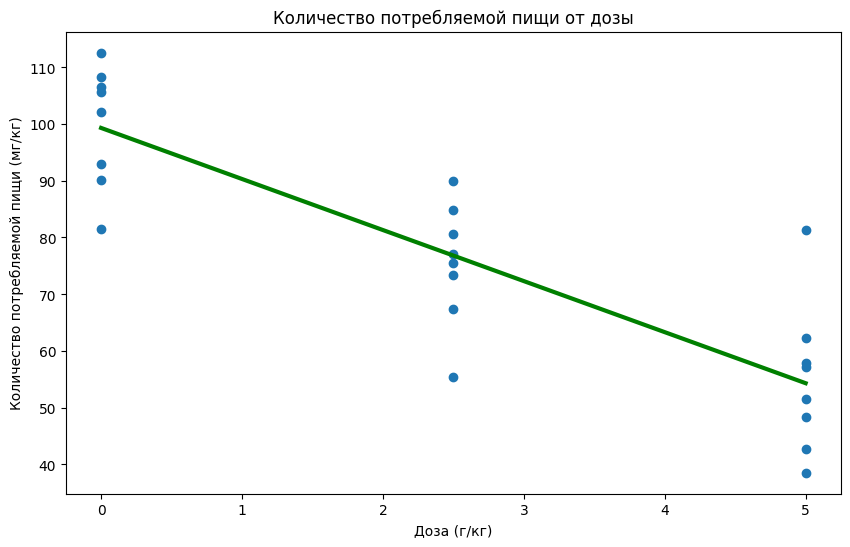

In [5]:
x = df['dose']
y = df['food_consump']
plt.scatter (x, y)

z = np.polyfit (x, y, 1)
p = np.poly1d (z)

plt.plot (x, p(x), color="green", linewidth= 3)

plt.title('Количество потребляемой пищи от дозы')
plt.xlabel('Доза (г/кг)')
plt.ylabel('Количество потребляемой пищи (мг/кг)')

Исходя из результатов графика можно заметить, что количество потребляемой пищи зависит от дозы амфетамина: при отстуствии дозы  количество потребляемой пищи - максимальное, с увеличением дозы амфетамина - количество потребляемой пищи сокращается.

In [9]:
reg_df = sm.ols(formula="food_consump ~ dose", data=df)
result_linear_ols = reg_df.fit()
print(result_linear_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           food_consump   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           7.27e-08
Time:                        11:37:56   Log-Likelihood:                -91.420
No. Observations:                  24   AIC:                             186.8
Df Residuals:                      22   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3313      3.680     26.994      0.0

**Ваш ответ:**
**$R^2$** = 0.739 - достаточно неплохой результат. Модель объясняет  74%  изменчивости количества потребляемой пищи.

Prob (F-statistic):	7.27e-08 -  что подтверждает значимость модели.

P>t не превышает 0.5 - оба коэффициента регрессии значимы.

$\hat{\beta}_0$ = 99.33

$\beta_1$ = -9.01

Уравнение линейной регрессии : $$
\text{food_consump} = 99.33 + (-9.01)\text{dose}.
$$

уравнение показывает, что без дозы амфетамина  количество потребляемой еды будет равна примерно 99, а также что с увеличением дозы амфетамина на единицу, количество потребляемой еды будет уменьшаться на 9.01 единицы.

## Задание 4-1.2: Невязка(остатки) значения

Регрессия в Упражнении 4-1.1 на самом деле валидна, даже несмотря на то, что предиктор $x$ имеет только 3 различных значения; для каждого фиксированного значения $x$ исследователь собрал случайную выборку значений $y$.

Однако одно предположение, которое делается с помощью простой линейной регрессии, заключается в том, что остатки имеют примерно нормальное распределение.

**Упражнение:** Вычислите остатки для приведенной выше регрессии и постройте нормальный вероятностный график остатков. Как вы думаете, они нормально распределены?



In [12]:
import statsmodels.api as sm

In [18]:
df['const'] = 1

prognoz = result_linear_ols.predict(df[['const', 'dose']])#Вычисление прогнозных значений
print(prognoz)

0     99.33125
1     99.33125
2     99.33125
3     99.33125
4     99.33125
5     99.33125
6     99.33125
7     99.33125
8     76.81250
9     76.81250
10    76.81250
11    76.81250
12    76.81250
13    76.81250
14    76.81250
15    76.81250
16    54.29375
17    54.29375
18    54.29375
19    54.29375
20    54.29375
21    54.29375
22    54.29375
23    54.29375
dtype: float64


In [20]:
# Вычисляем остатки
ostatki = df['food_consump'] - prognoz
print(ostatki)

0     13.26875
1      2.76875
2     -9.13125
3    -17.83125
4      6.26875
5     -6.33125
6      7.26875
7      8.96875
8     -3.51250
9      7.98750
10    -9.51250
11   -21.51250
12     3.88750
13    13.18750
14    -1.31250
15     0.28750
16   -15.79375
17    27.00625
18     2.80625
19     8.00625
20    -2.79375
21    -5.99375
22   -11.59375
23     3.60625
dtype: float64


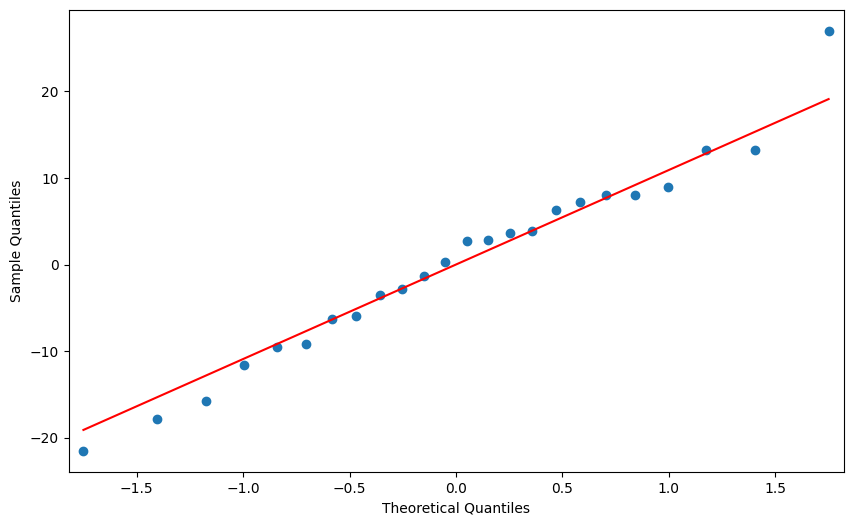

In [21]:
# Визуализация нормального вероятностного графика остатков
sm.qqplot(ostatki, line='s')
plt.show()

**Ваш ответ:**
Можно сказать, что отстатки распределены нормально, так как они ложатся на прямую линию, угол которой 45 градусов.